# Feature Importance and Regression Modeling


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load Preprocessed Dataset


In [6]:
df = pd.read_csv("../data/ai_job_dataset.csv")

# Drop irrelevant or problematic columns


In [7]:
df = df.drop(columns=["company_name", "required_skills", "job_title", "posting_date", "application_deadline"])

# Encode categorical variables using One-Hot Encoding


In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target


In [9]:
X = df_encoded.drop("salary_usd", axis=1)
y = df_encoded["salary_usd"]

# Split into training and testing sets


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline Linear Regression model


In [11]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# Evaluate model performance


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"R^2: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R^2: 0.852
MAE: 17018.11
MSE: 538101624.44
RMSE: 23197.02


# Plot predicted vs actual


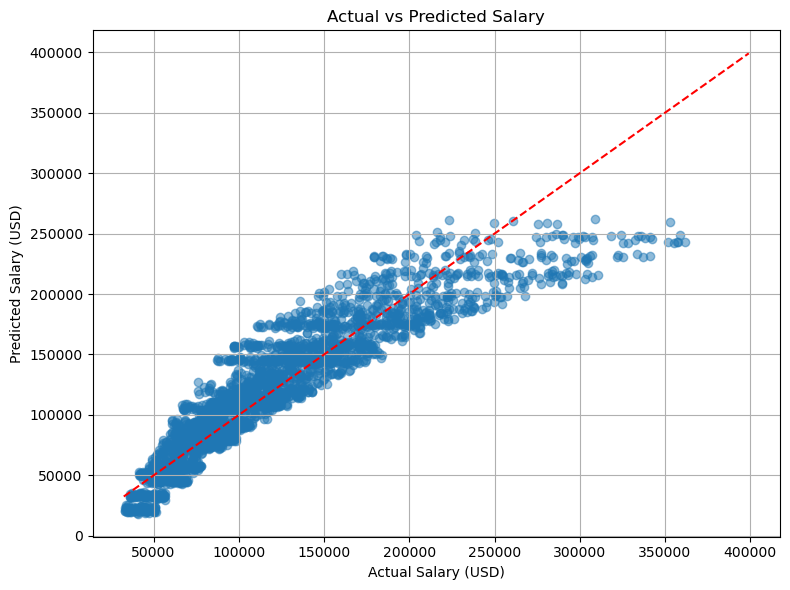

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature importance (coefficients)


In [15]:
importance = pd.Series(linreg.coef_, index=X.columns)
importance = importance.sort_values(ascending=False)

# Show top 20 important features


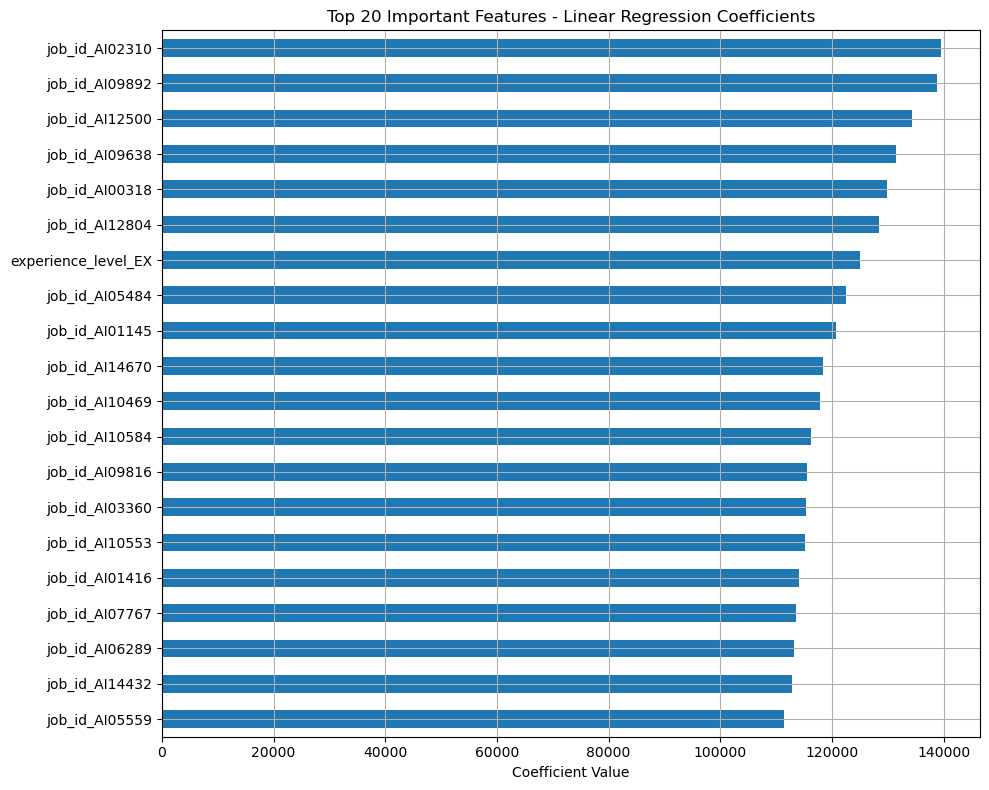

In [16]:
plt.figure(figsize=(10, 8))
importance.head(20).plot(kind='barh')
plt.title("Top 20 Important Features - Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
df_encoded.to_csv("../data/ai_job_dataset_encoded.csv", index=False)